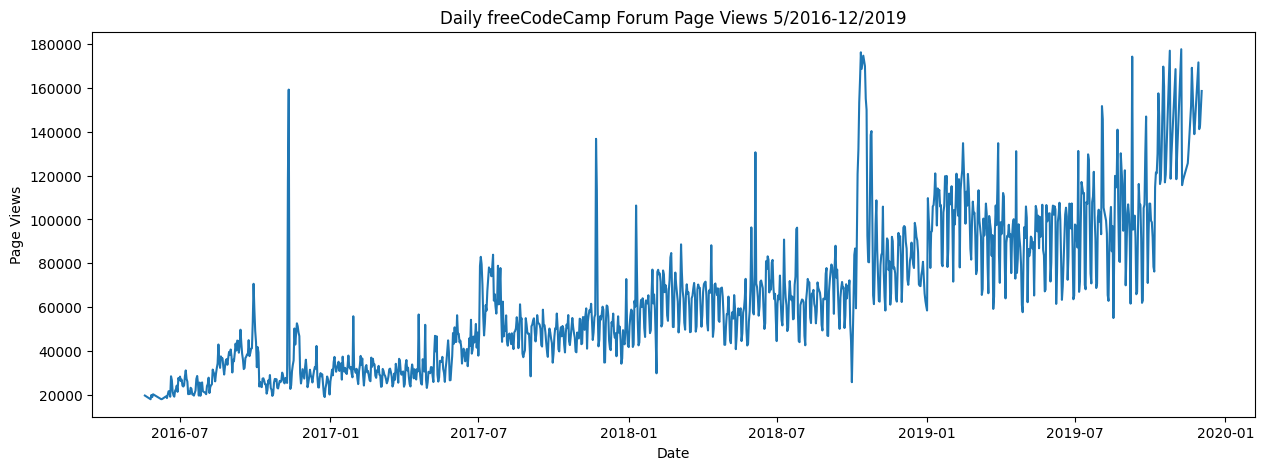

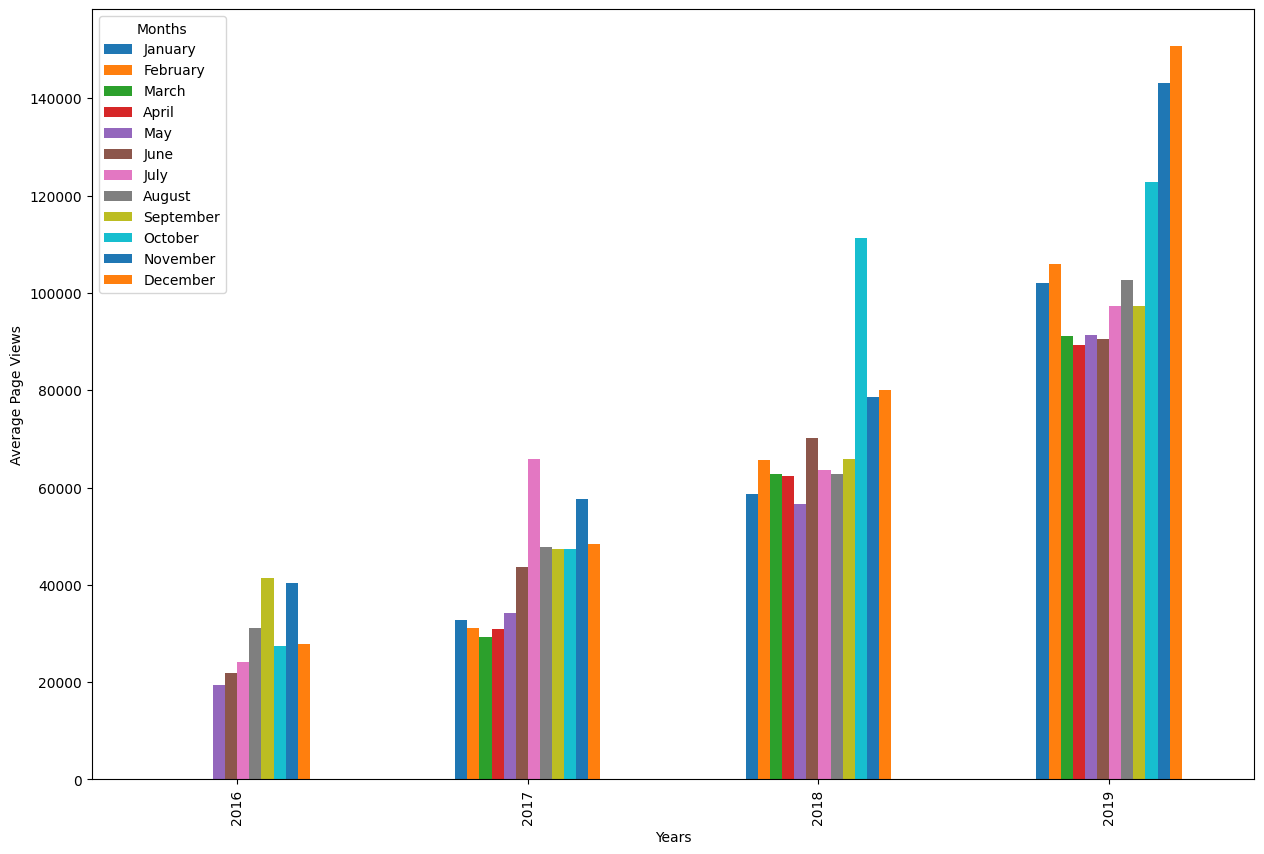

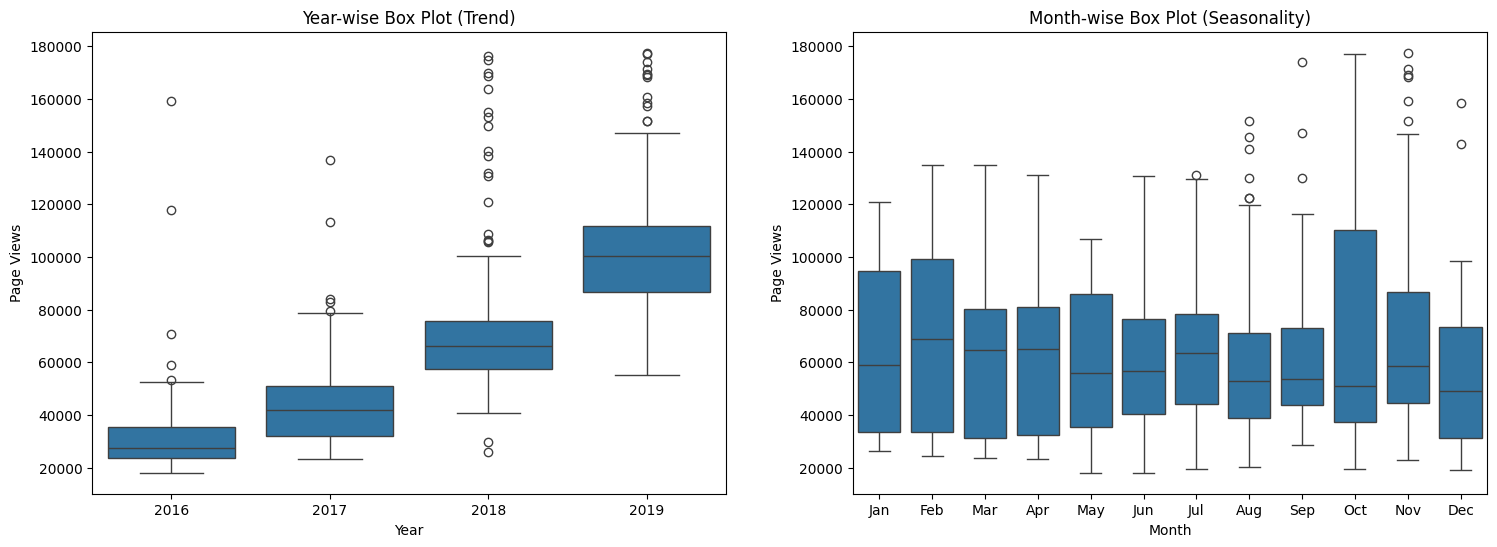

In [7]:

# Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.S


# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the 
# dataset.

# Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". 
# The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be 
# Date and the label on the y axis should be Page Views.


# Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png".
# It should show average daily page views for each month grouped by year. The legend should show 
# month labels and have a title of Months. On the chart, the label on the x axis should be Years 
# and the label on the y axis should be Average Page Views.


# Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to 
# "examples/Figure_3.png". These box plots should show how the values are distributed within a given year 
# or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) 
# and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels 
# on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to 
# prepare the data.

# medical_data_visualizer.py
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# 1) Import data (parse dates and set index to 'date')
df = pd.read_csv(
    'fcc-forum-pageviews.csv',
    parse_dates=['date'],
    index_col='date'
)

# 2) Clean data: filter out days in bottom 2.5% and top 2.5%
df = df.copy()
low = df['value'].quantile(0.025)
high = df['value'].quantile(0.975)
df = df[(df['value'] >= low) & (df['value'] <= high)].copy()


def draw_line_plot():
    """Draw a daily line chart."""
    df_line = df.copy()

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df_line.index, df_line['value'])
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig


def draw_bar_plot():
    """Draw a bar chart of average daily page views for each month grouped by year."""
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month

    # Average by year x month
    grouped = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    # Ensure months appear Jan..Dec
    grouped = grouped.reindex(columns=range(1, 13))

    # Plot
    fig, ax = plt.subplots(figsize=(15, 10))
    grouped.plot(kind='bar', ax=ax)

    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')

    month_names = [
        'January','February','March','April','May','June',
        'July','August','September','October','November','December'
    ]
    ax.legend(labels=month_names, title='Months')

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig


def draw_box_plot():
    """Draw two adjacent box plots: Year-wise (Trend) and Month-wise (Seasonality)."""
    # Prepare data (given by boilerplate + copy)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Month order Jan..Dec
    month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    df_box['month'] = pd.Categorical(df_box['month'], categories=month_order, ordered=True)

    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Year-wise Box Plot (Trend)
    sns.boxplot(data=df_box, x='year', y='value', ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    # Month-wise Box Plot (Seasonality)
    sns.boxplot(data=df_box, x='month', y='value', order=month_order, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


# Execução local (opcional)
if __name__ == "__main__":
    draw_line_plot()
    draw_bar_plot()
    draw_box_plot()

